In [1]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data (1).xlsx to Airlines+Data (1).xlsx


In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel("Airlines+Data (1).xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


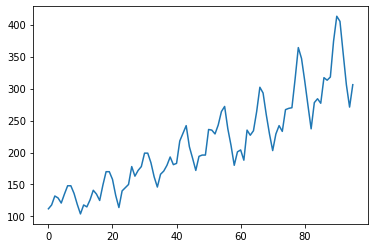

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(0,96),df['Passengers'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc57a1ba820>]],
      dtype=object)

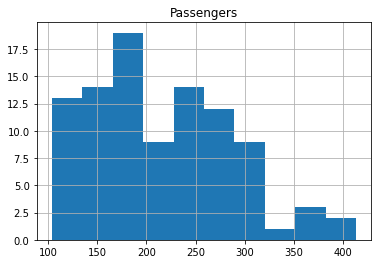

In [7]:
df.hist('Passengers')

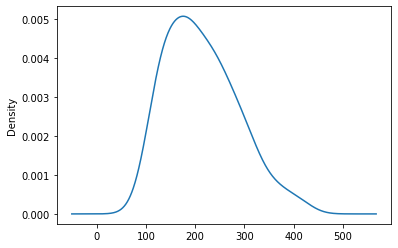

In [8]:
df['Passengers'].plot(kind='kde')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


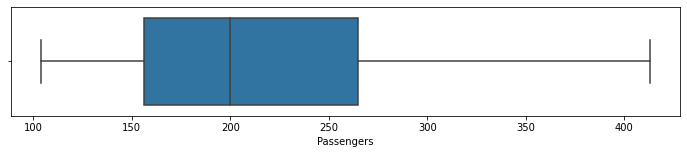

In [9]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)

<ipython-input-10-9dce49dca158>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='additive',freq = 10)


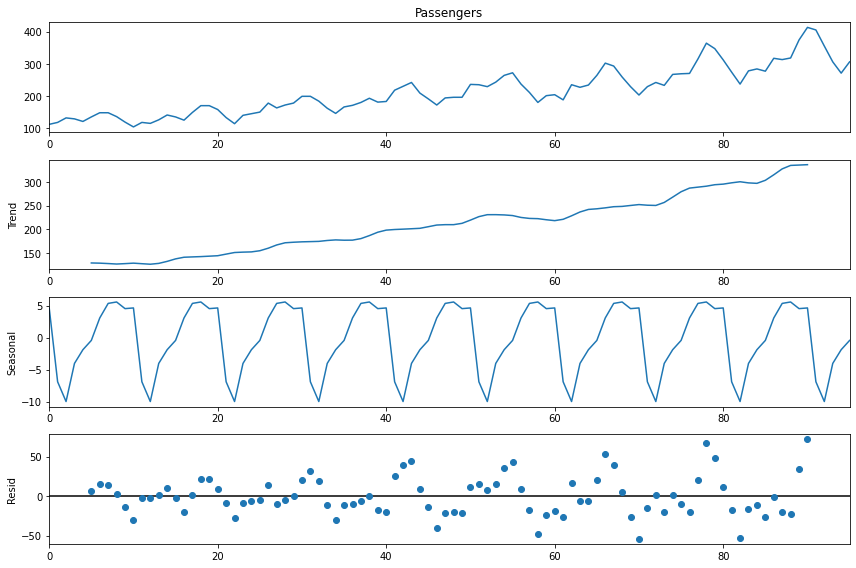

In [10]:
from pylab import rcParams
import statsmodels.api as sma
rcParams['figure.figsize'] = 12,8
decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='additive',freq = 10)
fig = decomposition.plot()
plt.show()

<ipython-input-11-4e61072d496e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='multiplicative',freq = 10)


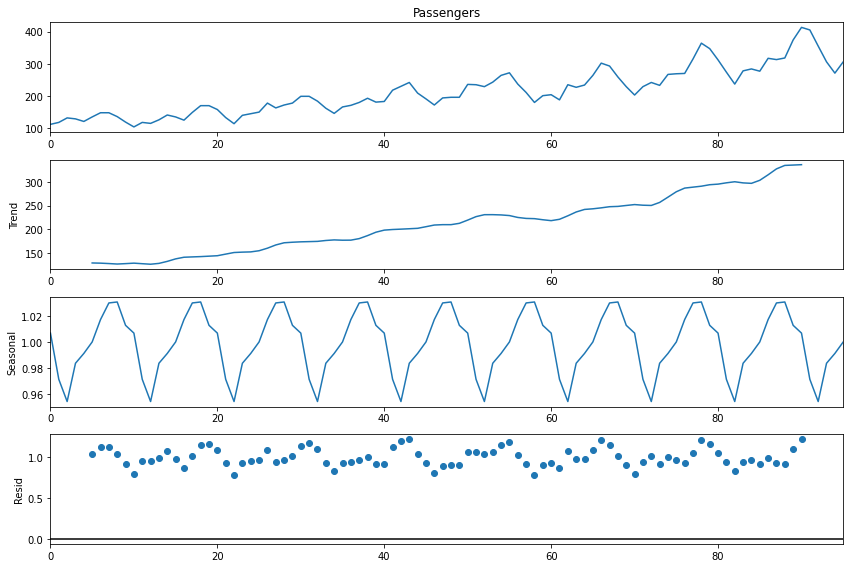

In [11]:
decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='multiplicative',freq = 10)
fig = decomposition.plot()
plt.show()

In [12]:
train_len = 80
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [13]:
train.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
test.head()

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284


In [15]:
y_hat_naive = test.copy()
y_hat_naive.head()

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284


In [16]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [17]:
y_hat_naive.head()

,Month,Passengers,naive_forecast
80,2001-09-01,312,347
81,2001-10-01,274,347
82,2001-11-01,237,347
83,2001-12-01,278,347
84,2002-01-01,284,347


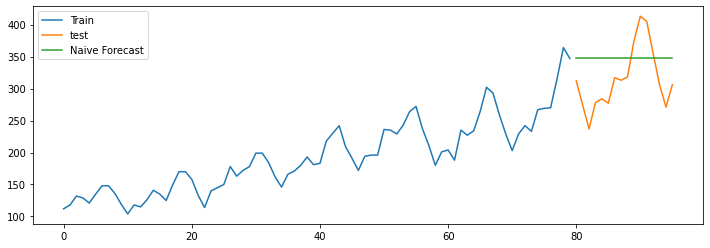

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
y_hat_avg = test.copy()

In [20]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [21]:
y_hat_avg.head()

,Month,Passengers,avg_forecast
80,2001-09-01,312,193.45
81,2001-10-01,274,193.45
82,2001-11-01,237,193.45
83,2001-12-01,278,193.45
84,2002-01-01,284,193.45


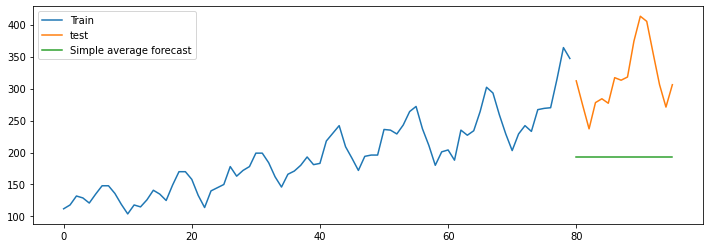

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

57.46

In [24]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

17.54

In [25]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54


In [26]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse

130.58

In [27]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

37.25

In [28]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25


In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
y_hat_ses = test.copy()
# Forecast for 16 months
y_hat_ses['ses_forecast'] = model_fit.forecast(16)

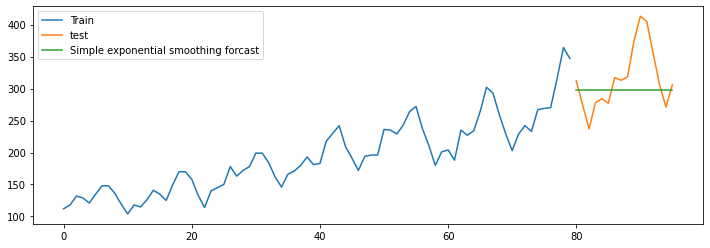

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse

50.86

In [33]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

11.38

In [34]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_ES= ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-35-d88e69900884>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.7121531764824972,
 'damping_trend': nan,
 'initial_level': 164.56732493226707,
 'initial_trend': 0.6387290574604984,
 'initial_seasons': array([-54.48536918, -48.26292827, -34.28606726, -39.35654791,
        -47.58885687, -32.97265183, -19.61056368, -21.21802741,
        -35.21362625, -55.07176781, -71.75276722, -56.294565  ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [36]:
y_hat_es = test.copy()
y_hat_es['es_forecast'] = model_ES_fit.forecast(16)

In [37]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_es['es_forecast'])).round(2)
rmse

12.78

In [38]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_es['es_forecast'])/test['Passengers'])*100),2)
mape

3.15

In [39]:
results = results.append({'Method':'expenential smoothing with additive seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,expenential smoothing with additive seasonalit...,12.78,3.15


In [40]:
model_ES_mu_ad= ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_mu_ad_fit.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-40-ecd47495b5ba>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 1.4015547081310877e-13,
 'damping_trend': nan,
 'initial_level': 139.76857217210951,
 'initial_trend': 0.37271924229162146,
 'initial_seasons': array([0.75845036, 0.74683587, 0.86506989, 0.83307333, 0.82430153,
        0.92063837, 1.02112292, 1.004222  , 0.86935642, 0.76073992,
        0.65959881, 0.74409454]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [41]:
y_hat_es_mu_ad = test.copy()
y_hat_es_mu_ad['es_mu_ad_forecast'] = model_ES_mu_ad_fit.forecast(16)

In [42]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_es_mu_ad['es_mu_ad_forecast'])).round(2)
rmse

14.07

In [43]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_es_mu_ad['es_mu_ad_forecast'])/test['Passengers'])*100),2)
mape

3.86

In [44]:
results = results.append({'Method':'expenential smoothing with multilicative seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,expenential smoothing with additive seasonalit...,12.78,3.15
4,expenential smoothing with multilicative seaso...,14.07,3.86
